<a href="https://colab.research.google.com/github/Qjizhi/CSE659/blob/main/DreamboothCan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the implementation of [Dreambooth](https://dreambooth.github.io/) using diffusers library. This notebook is base on the docs [DreamBooth](https://huggingface.co/docs/diffusers/v0.30.2/en/training/dreambooth#dreambooth) of diffusers.

Paper: DreamBooth: Fine Tuning Text-to-Image Diffusion Models for Subject-Driven Generation.   
Link: https://arxiv.org/abs/2208.12242.  
Name: Feng Qiao  

![](https://dreambooth.github.io/DreamBooth_files/teaser_static.jpg)

### 1. Install packages

In [1]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install .

Cloning into 'diffusers'...
remote: Enumerating objects: 71154, done.
remote: Counting objects: 100% (711/711), done.
remote: Compressing objects: 100% (366/366), done.
remote: Total 71154 (delta 439), reused 463 (delta 283), pack-reused 70443 (from 1)
Receiving objects: 100% (71154/71154), 50.17 MiB | 11.14 MiB/s, done.
Resolving deltas: 100% (52530/52530), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2772952 sha256=6caa42d08e33ee504555a59fcce11a9c8174a5ddf9821072643fcac80f3c915b
  Stored in directory: /tmp/pip-ephem-wheel-cache-48da9rob/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers


In [ ]:
%cd examples/dreambooth
!pip install -r requirements.txt

[Errno 2] No such file or directory: 'examples/dreambooth'
/content/diffusers/examples/dreambooth
  Using cached ftfy-6.2.3-py3-none-any.whl.metadata (7.8 kB)
  Using cached peft-0.7.0-py3-none-any.whl.metadata (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 7.2 MB/s eta 0:00:00


### 2. Login to huggingface and wandb

In [ ]:
# !pip install huggingface_hub
# !huggingface-cli login
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Upload traning progress to wandb
!pip install wandb

import wandb
wandb.login()

  Using cached wandb-0.18.1-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached sentry_sdk-2.14.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached setproctitle-1.3.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.9 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### 3. Download datasets

In [ ]:
# Download training datases
!git clone https://github.com/google/dreambooth.git

Cloning into 'dreambooth'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 212 (delta 5), reused 1 (delta 1), pack-reused 206 (from 1)
Receiving objects: 100% (212/212), 106.84 MiB | 18.46 MiB/s, done.
Resolving deltas: 100% (10/10), done.


### 4. Dispaly and training on dataset of can

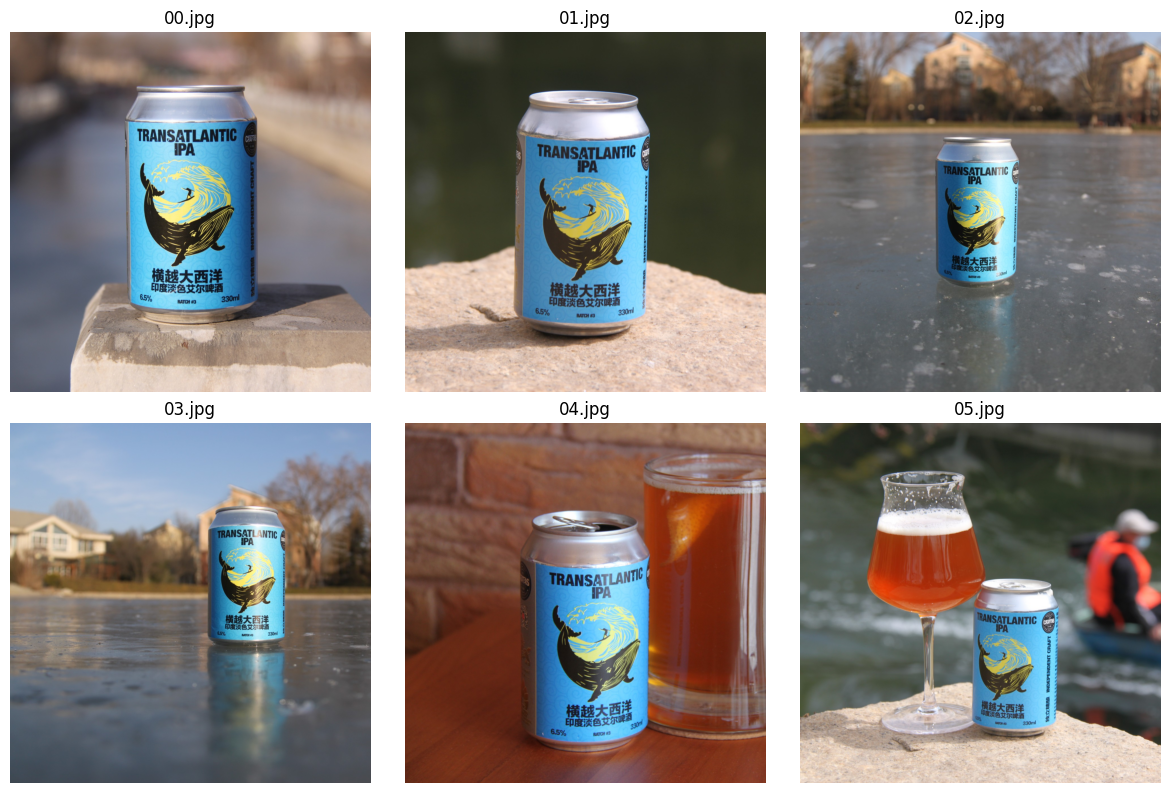

In [ ]:
# Display training images
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the directory containing images
folder_path = './dreambooth/dataset/can'  # Change this to your folder path

# Get the list of image files in the folder
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'gif'))])

# Select up to 6 images
images_to_display = image_files[:6]

# Create a subplot for displaying images
plt.figure(figsize=(12, 8))

for i, image_file in enumerate(images_to_display):
    img = mpimg.imread(os.path.join(folder_path, image_file))

    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(image_file)

plt.tight_layout()
plt.show()

In [ ]:
# Check GPU memory
!nvidia-smi --query-gpu=memory.used,memory.free,memory.total --format=csv
# use default to train on 16gb GPU
!accelerate config default

memory.used [MiB], memory.free [MiB], memory.total [MiB]
0 MiB, 15101 MiB, 15360 MiB
accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
# Set environment variables
os.environ["MODEL_NAME"] = "runwayml/stable-diffusion-v1-5"
os.environ["INSTANCE_DIR"] = "./dreambooth/dataset/can"
os.environ["OUTPUT_DIR"] = "DreamboothCan"

# Run the training script
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path={os.environ['MODEL_NAME']}  \
  --instance_data_dir={os.environ['INSTANCE_DIR']} \
  --output_dir={os.environ['OUTPUT_DIR']} \
  --instance_prompt="a photo of can on the bed" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=400 \
  --push_to_hub \
  --mixed_precision="bf16" \
  --report_to wandb \
  --use_8bit_adam


2024-09-23 21:05:50.938762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 21:05:51.028328: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 21:05:51.037203: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 21:05:51.060534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 21:05:53.173975: W tensorflow/comp

### 5. Inference 4 times and display results

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

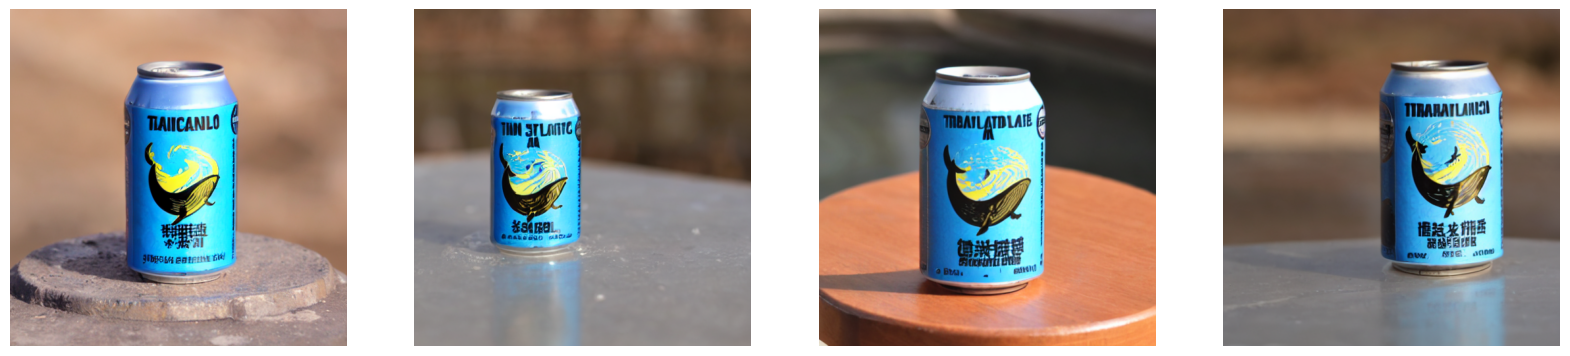

In [7]:
from diffusers import AutoPipelineForText2Image
import torch
import matplotlib.pyplot as plt

# Load the model
pipeline = AutoPipelineForText2Image.from_pretrained("FQiao/DreamboothCan", torch_dtype=torch.float16).to("cuda")

# Define the prompt
prompt = "a can on a table"

# Generate 4 images
images = []
for _ in range(4):
    image = pipeline(prompt).images[0]
    images.append(image)

# Display the images together using Matplotlib
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()
# It's worth noting that the text is not well reconstructed.
# And it seems the prompt doesn't work in some cases, I think this is because the training dataset is not diverse, 3 of 6 images are standing on rocks.